(1) 生成兩組在區間上滿足均勻分佈(uniform distribution)的隨機數[0,1]，並為每組創建 10,000 個均勻隨機數。均勻隨機數可以從某個數到另一個數之一致概率生成的隨機函數np.random.uniform來產生。例如，np.random.uniform(0.0, 1.0, 10)可以生成 0 到 1 範圍內的 10 個均勻隨機數值。

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_min, x_max = 0.0, 1.0
np.random.uniform(x_min, x_max, 1000)

array([4.41630559e-01, 9.08065180e-01, 2.04962554e-01, 5.98681378e-01,
       4.83463065e-01, 6.81951949e-01, 8.81358914e-01, 2.55728459e-03,
       3.03673605e-01, 6.49536070e-01, 3.78331736e-01, 6.02071409e-01,
       5.04667232e-01, 1.07372356e-02, 2.35598317e-01, 6.88935962e-01,
       9.94214431e-01, 2.99290771e-01, 7.98363066e-01, 9.64547728e-01,
       2.12640788e-01, 8.22631633e-01, 5.44046022e-01, 9.52424855e-01,
       2.29980800e-01, 3.37437485e-01, 8.59793686e-01, 3.80987804e-01,
       1.17510518e-01, 8.70523468e-01, 5.43554385e-01, 8.04504147e-01,
       1.45963826e-01, 1.55084558e-01, 4.60207274e-01, 8.80310235e-01,
       4.15245433e-01, 1.88073922e-01, 1.35488882e-01, 9.34894125e-01,
       1.55161874e-01, 6.95643519e-01, 6.21420716e-01, 6.35617828e-01,
       6.06540394e-01, 9.59713514e-01, 8.79659360e-02, 4.97067745e-01,
       4.84403265e-01, 3.75990288e-02, 8.97872225e-01, 3.89470615e-01,
       1.96011961e-01, 2.12003307e-01, 1.40481726e-01, 8.72136918e-01,
      

（2）在𝑥 – 𝑦平面上，假設平面中心為(0,0), 考慮一個半徑為 1 的圓和一個邊長為 2的正方形。此時圓的面積為𝜋圓周率而正方形的面積是4。計算方式是檢討有多少(x,y)配對點在這個產生的10,000 個隨機數中的組合中會有多少個點在圓圈內？在這裡, 一個配對點(x,y)進入一個圓圈的內部表示坐標原點與配對點（𝑥 ，𝑦 ）之向量長度是否小於或等於1的情況為判據。計算之長度以歐幾里得範數計算(就是三角形之斜邊長)。在 Python 中，math.hypot(x,y)您可以使用計算。

In [3]:
import math
m = 10000
n = 0
x = np.random.uniform(0.0,1.0,10000)
y = np.random.uniform(0.0,1.0,10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:
        n += 1

(3)半徑為1的圓的面積與長度為2的正方形面積之比為𝜋:4, 或是圓周率/4:1所以，讓我們使用這個和之前的結果來找到 pi。

In [4]:
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 3.138


In [8]:
np.random.randn(0,10,1000)

array([], shape=(0, 10, 1000), dtype=float64)

(4)如果產生之亂數以不同機率分配產生, 其結果會不同嗎? (例如使用標準常態或是其他分配?)

In [11]:
m = 10000
n = 0
x = np.random.rand(10000)
y = np.random.rand(10000)
for i in range(10000):
    if math.hypot(x[i],y[i]) <= 1:
        n += 1

In [12]:
pi = 4 * n / m
print("pi = {}".format(pi))

pi = 3.1664


(5) 計算之結果是用繪圖方式繪出趨勢. 

3.1484


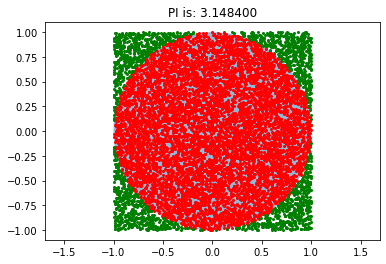

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

m = 10000
# 圆的信息
r = 1.0         # 半径

a, b = (0., 0.) # 圆心
 
# 正方形区域边界
x_min, x_max = a-r, a+r
y_min, y_max = b-r, b+r
n = 0
x = np.random.uniform(x_min,x_max,m)
y = np.random.uniform(y_min,y_max,m)

d = np.sqrt((x)**2 + (y)**2)

total = np.where(d<=1.0,1,0)
n = np.sum(total)
pi = 4 * n / m
print(pi)
fig = plt.figure() 
axes = fig.add_subplot(111) 
axes.set_title('PI is: %f'  %pi)    # 標題
for i in range(len(total)):
    if total[i] == 1:
        axes.plot(x[i], y[i],'ro',markersize = 2)  # 圓內顏色
    else:
        axes.plot(x[i], y[i],'go',markersize = 2)  # 圓外顏色
        
plt.axis('equal') # 防止圖像變形
 
circle = Circle(xy=(a,b), radius=r, alpha=0.5)
axes.add_patch(circle)
 
plt.show()

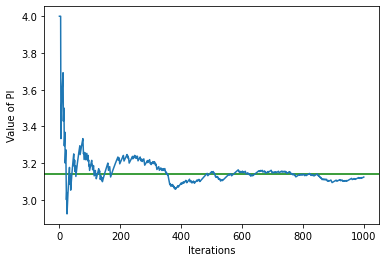

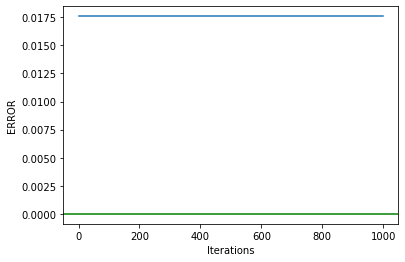

In [16]:
import random
pi_value = []
in_count = 0
out_count = 0
pi = 0
avg_pi_errors = 0
for i in range(1000):
    x = random.randrange(-100,100)
    y = random.randrange(-100,100)
    if (x**2+y**2 > 100**2):
        out_count += 1
    else:
        in_count += 1
        
    pi= 4.0 * in_count / (in_count + out_count)
    pi_value.append(pi)
    avg_pi_errors = [abs(math.pi - pi) for i in pi_value]

# Plot the PI values   
plt.axhline(y=math.pi, color='g', linestyle='-')
plt.plot(pi_value)
plt.xlabel("Iterations")
plt.ylabel("Value of PI")
plt.show()

# Plot the error in calculation
plt.axhline(y=0.0, color='g', linestyle='-')
plt.plot(avg_pi_errors)
plt.xlabel("Iterations")
plt.ylabel("ERROR")
plt.show()